In [1]:
import pandas as pd

In [2]:

보안등=pd.read_csv('./500m_보안등.csv')
지킴이집=pd.read_csv('./500m_아동안전지킴.csv')
유치원=pd.read_csv('./500m_유치원.csv')
주차장=pd.read_csv('./500m_주차장.csv')
초중고=pd.read_csv('./500m_초중고.csv')
치안유관업소=pd.read_csv('./500m_치안.csv')
어린이집=pd.read_csv('./500m_어린이집.csv')

In [3]:
보안등.columns

Index(['_cctv_nm', 'lon', 'lat', '보안등'], dtype='object')

In [4]:
cctv=pd.read_csv('./input/1.김해시_CCTV설치현황.csv')

In [5]:
cctv

,cctv_nm,type,install_ym,lon,lat
0,(동상동30)1_동상1092-31,방범용,'2020-11,128.883393,35.232738
1,(동상동31)1_동상1015-4,방범용,'2020-11,128.882718,35.236226
2,(동상동31)2_동상1015-4,방범용,'2020-11,128.882718,35.236226
3,(동상동31)3_동상1015-4,방범용,'2020-11,128.843626,35.229568
4,(동상동31)4_동상1015-4,방범용,'2020-11,128.883026,35.234773
...,...,...,...,...,...
3247,희망공원3_삼계1459-5↓,방범용,'2015-12,128.820289,35.178996
3248,희망공원4_삼계1459-5←,방범용,'2015-12,128.710856,35.302871
3249,희망공원5_삼계1459-5△,방범용,'2015-12,128.769536,35.258636
3250,힐하우스1_외동1244-3↑,방범용,'2014-06,128.858039,35.231724


In [6]:
cctv=pd.read_csv('./500m_씨씨티비.csv')

In [7]:
cctv

,_cctv_nm,lon,lat,cctv
0,(동상동30)1_동상1092-31,128.883393,35.232738,139
1,(동상동31)1_동상1015-4,128.882718,35.236226,113
2,(동상동31)2_동상1015-4,128.882718,35.236226,113
3,(동상동31)3_동상1015-4,128.843626,35.229568,22
4,(동상동31)4_동상1015-4,128.883026,35.234773,112
...,...,...,...,...
3247,희망공원3_삼계1459-5↓,128.820289,35.178996,17
3248,희망공원4_삼계1459-5←,128.710856,35.302871,12
3249,희망공원5_삼계1459-5△,128.769536,35.258636,15
3250,힐하우스1_외동1244-3↑,128.858039,35.231724,51


In [19]:
'''보안등=보안등.drop(['lon', 'lat'],1)
지킴이집=지킴이집.drop(['lon', 'lat'],1)
유치원=유치원.drop(['lon', 'lat'],1)
어린이집=어린이집.drop(['lon', 'lat'],1)
주차장=주차장.drop(['lon', 'lat'],1)
초중고=초중고.drop(['lon', 'lat'],1)
치안유관업소=치안유관업소.drop(['lon', 'lat'],1)'''
cctv=cctv.drop(['lon', 'lat'],1)

In [20]:
df_merge=pd.merge(cctv,보안등,on='_cctv_nm',how='outer')
df_merge=pd.merge(df_merge,지킴이집,on='_cctv_nm',how='outer')
df_merge=pd.merge(df_merge,유치원,on='_cctv_nm',how='outer')
df_merge=pd.merge(df_merge,주차장,on='_cctv_nm',how='outer')
df_merge=pd.merge(df_merge,초중고,on='_cctv_nm',how='outer')
df_merge=pd.merge(df_merge,치안유관업소,on='_cctv_nm',how='outer')

df_merge

,_cctv_nm,cctv,보안등,아안집,유치원,주차장,초중고,NUMPOINTS
0,(동상동30)1_동상1092-31,139,288,0,0,7,3,495
1,(동상동31)1_동상1015-4,113,256,0,3,6,2,273
2,(동상동31)2_동상1015-4,113,256,0,3,6,2,273
3,(동상동31)3_동상1015-4,22,1,0,0,0,0,24
4,(동상동31)4_동상1015-4,112,272,0,3,6,5,350
...,...,...,...,...,...,...,...,...
3247,희망공원3_삼계1459-5↓,17,44,1,1,0,1,29
3248,희망공원4_삼계1459-5←,12,32,0,0,1,0,15
3249,희망공원5_삼계1459-5△,15,32,0,0,2,0,23
3250,힐하우스1_외동1244-3↑,51,181,4,1,0,3,157


In [21]:
df_merge.columns

Index(['_cctv_nm', 'cctv', '보안등', '아안집', '유치원', '주차장', '초중고', 'NUMPOINTS'], dtype='object')

In [22]:
df_merge.rename(columns = {'_cctv_nm':'cctv_name','NUMPOINTS':'치안유관'}, inplace=True)

In [23]:
df_merge_corr=df_merge.corr()

In [26]:
df_merge_corr

,cctv,보안등,아안집,유치원,주차장,초중고,치안유관
cctv,1.000000,0.873926,0.152597,0.433379,0.533770,0.513156,0.660360
보안등,0.873926,1.000000,0.212504,0.371804,0.520803,0.436851,0.723650
아안집,0.152597,0.212504,1.000000,0.438530,0.107762,0.384103,0.420874
유치원,0.433379,0.371804,0.438530,1.000000,0.197048,0.668853,0.251557
주차장,0.533770,0.520803,0.107762,0.197048,1.000000,0.313076,0.546140
초중고,0.513156,0.436851,0.384103,0.668853,0.313076,1.000000,0.363750
치안유관,0.660360,0.723650,0.420874,0.251557,0.546140,0.363750,1.000000


In [24]:
import seaborn as sns
import numpy as np

/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current

<AxesSubplot:>

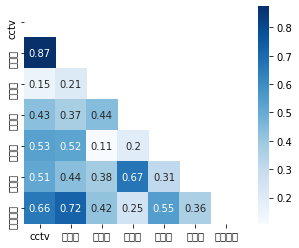

In [25]:
mask=np.zeros_like(df_merge.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df_merge.corr(),annot=True,mask=mask,cmap = 'Blues', square=True)

In [ ]:
# 상관계수 0.7 이상: 보안등(0.87)
# 상관계수 0.5 이상: 치안유관(0.66), 주차장(0.55), 초중고(0.51)
# 상관계수 0.5 이하: 아동지킴이집(0.15), 유치원수(0.43)